## Agglomerative Clustering Algorithm


0. **Prepare the data**
   - Standardize or normalise features if they have different scales (optional but common).

1. **Start with singleton clusters**
   - Treat every observation $x_i$ as its own cluster $C_i = \{x_i\}$.

2. **Compute the initial proximity matrix**
   - For every pair of clusters $(C_i, C_j)$, compute the inter‑cluster distance $d(C_i, C_j)$ using a chosen metric (e.g. Euclidean) and a linkage criterion (single, complete, average, Ward, etc.).

3. **Iteratively merge the closest pair**
   **a.** Identify the two clusters with the minimum distance in the current proximity matrix.
   **b.** Merge them to form a new cluster $C_{new} = C_i \cup C_j$.
   **c.** Record the merge (distance and cluster sizes) for dendrogram construction.

4. **Update the proximity matrix**
   - Recompute distances between $C_{new}$ and all remaining clusters according to the linkage rule; keep all other distances unchanged.

5. **Repeat steps 3–4** Continue merging and updating until one stopping condition is met:
   - only one cluster remains, **or**
   - a predefined number $k$ of clusters is reached, **or**
   - the minimum inter‑cluster distance exceeds a given threshold.

6. **Extract clusters (optional)**
   - If you need $k$ flat clusters, “cut” the dendrogram at the height that yields exactly $k$ branches (or at a distance threshold).

7. **Interpret & validate**
   - Examine cluster cohesion/separation (silhouette, Davies–Bouldin, etc.) and assess domain relevance.

That sequence captures the full agglomerative algorithm: initialise, repeatedly find‑and‑merge the closest pair, update distances, and stop when the desired granularity is achieved.


Initial Clusters (Step 1)


,cluster,x,y
0,c1,1.0,1.0
1,c2,1.5,1.2
2,c3,3.0,4.0
3,c4,5.0,4.0
4,c5,3.5,3.5
5,c6,4.5,5.0


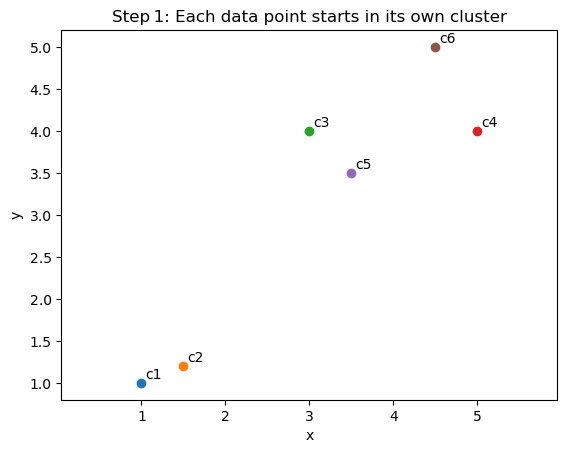

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a small 2‑D dataset (six points)
points = [(1, 1), (1.5, 1.2), (3, 4), (5, 4), (3.5, 3.5), (4.5, 5)]
cluster_ids = [f"c{i+1}" for i in range(len(points))]

# Create a DataFrame to list the initial clusters
df = pd.DataFrame(points, columns=["x", "y"])
df["cluster"] = cluster_ids
print("Initial Clusters (Step 1)")
display(df[["cluster", "x", "y"]])

# Plot the points, annotating each with its cluster label
plt.figure()
for (x, y), label in zip(points, cluster_ids):
    plt.scatter(x, y)              # default color cycle; no explicit colors set
    plt.text(x + 0.05, y + 0.05, label)

plt.title("Step 1: Each data point starts in its own cluster")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

### Step 1 – Initialise the clusters

* We create the list **C** and add one cluster per data point:

$$
C \;=\; \bigl\{\,\{x_1\}=c_1,\; \{x_2\}=c_2,\; \dots,\; \{x_6\}=c_6\bigr\}.
$$

Each cluster currently contains exactly **one** observation, so $|C| = 6$.


'Step 2 – Pairwise distances between singleton clusters'

,c1,c2,c3,c4,c5,c6
c1,0.000,0.539,3.606,5.000,3.536,5.315
c2,0.539,0.000,3.176,4.482,3.048,4.841
c3,3.606,3.176,0.000,2.000,0.707,1.803
c4,5.000,4.482,2.000,0.000,1.581,1.118
c5,3.536,3.048,0.707,1.581,0.000,1.803
c6,5.315,4.841,1.803,1.118,1.803,0.000


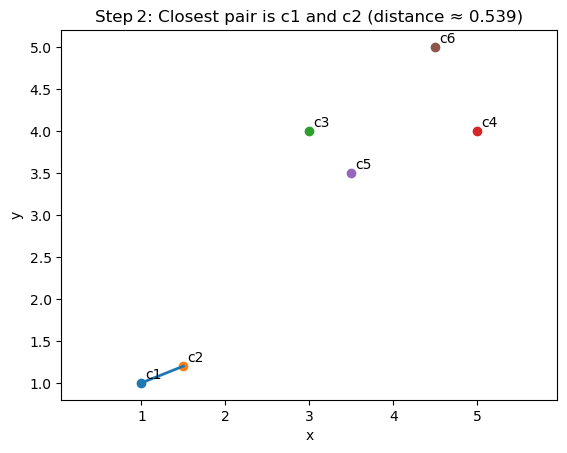

In [38]:
import itertools
import math
# Step 2 data (same six singleton clusters from Step 1)
#points = [(1, 1), (1.5, 1.2), (3, 4), (5, 4), (3.5, 3.5), (4.5, 5)]
labels = [f"c{i+1}" for i in range(len(points))]

# Compute the full Euclidean‑distance matrix (each cluster contains one point)
N = len(points)
dist_mat = [[0.0] * N for _ in range(N)]
for (i, (x1, y1)), (j, (x2, y2)) in itertools.combinations(enumerate(points), 2):
    d = math.dist((x1, y1), (x2, y2))
    dist_mat[i][j] = dist_mat[j][i] = d

df = pd.DataFrame(dist_mat, index=labels, columns=labels).round(3)
display("Step 2 – Pairwise distances between singleton clusters", df)

# Identify the minimum non‑zero distance and the corresponding pair(s)
min_d = float("inf")
min_pairs = []
for i in range(N):
    for j in range(i + 1, N):
        d = dist_mat[i][j]
        if d < min_d - 1e-12:
            min_d = d
            min_pairs = [(i, j)]
        elif abs(d - min_d) < 1e-12:
            min_pairs.append((i, j))

# For illustration, choose the first pair (ties resolved at random per the algorithm)
i_min, j_min = min_pairs[0]

# Plot the points and draw a line between the closest pair
plt.figure()
for (x, y), lbl in zip(points, labels):
    plt.scatter(x, y)               # no explicit color
    plt.text(x + 0.05, y + 0.05, lbl)

# Line connecting the closest pair
x1, y1 = points[i_min]
x2, y2 = points[j_min]
plt.plot([x1, x2], [y1, y2], linewidth=2)  # thicker line for emphasis

plt.title(f"Step 2: Closest pair is {labels[i_min]} and {labels[j_min]} (distance ≈ {min_d:.3f})")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### Step 2 – Find the closest pair of clusters

Because each cluster currently contains exactly one point, the **cluster–cluster distance** is just the Euclidean distance between those points (equivalent to “single linkage” at this stage).

1. **Compute all pairwise distances** – the table above shows them (values rounded to 3 dp).
2. **Identify the minimum non‑zero distance**:

   $$
   \min_{i\neq j} D(c_i,c_j)\;=\;0.539\quad\text{between }c_1\text{ and }c_2.
   $$

   No ties occur, so $(c_1,c_2)$ is the unique closest pair.
3. The plot highlights this pair with a connecting line, showing that they are merged to form the first cluster.


'Step 3 - New clusters after merging c1 and c2'

,cluster,members
0,c12,"c1, c2"
1,c3,c3
2,c4,c4
3,c5,c5
4,c6,c6


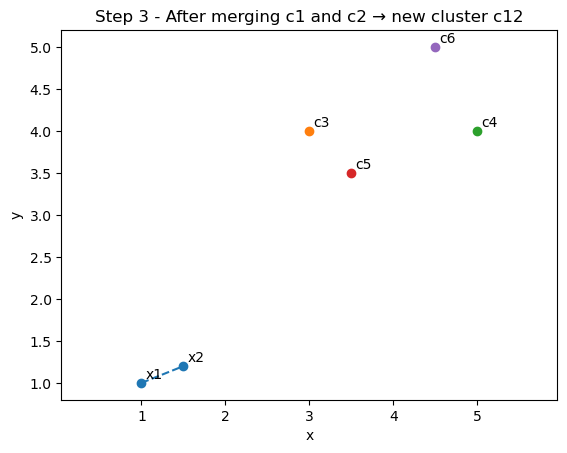

In [39]:
# Merge clusters c1 and c2 into c12 ------------------------------
labels = [f"c{i+1}" for i in range(len(points))]
# Define the new cluster configuration after the merge
clusters = {
    "c12": [0, 1],  # indices of x1 and x2
    "c3": [2],
    "c4": [3],
    "c5": [4],
    "c6": [5],
}

# Build a tidy DataFrame that lists cluster → member points
rows = []
for clust, idx_list in clusters.items():
    members = ", ".join(labels[i] for i in idx_list)
    rows.append({"cluster": clust, "members": members})
df_clusters = pd.DataFrame(rows)

display("Step 3 - New clusters after merging c1 and c2", df_clusters)

# --- Plot -------------------------------------------------------------------
plt.figure()
# Plot the merged cluster in one call → same default color
merged_coords = [points[i] for i in clusters["c12"]]
plt.scatter([p[0] for p in merged_coords], [p[1] for p in merged_coords])
for (x, y), lbl in zip(merged_coords, ["x1", "x2"]):
    plt.text(x + 0.05, y + 0.05, lbl)

# Plot the remaining singleton clusters (each gets the next default color)
for clust in ["c3", "c4", "c5", "c6"]:
    idx = clusters[clust][0]
    x, y = points[idx]
    plt.scatter(x, y)
    plt.text(x + 0.05, y + 0.05, labels[idx])

# Draw a bounding ellipse-like outline around the merged cluster
x_coords = [p[0] for p in merged_coords]
y_coords = [p[1] for p in merged_coords]
x_center = sum(x_coords)/len(x_coords)
y_center = sum(y_coords)/len(y_coords)
# dashed outline to emphasize new cluster
plt.plot([min(x_coords), max(x_coords)], [min(y_coords), max(y_coords)], linestyle="--")

plt.title("Step 3 - After merging c1 and c2 → new cluster c12")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

### Merge the two closest clusters

We take the pair found in Step 2—**$c_1$ and $c_2$**—and merge them into a single new cluster:

$$
c_{12} \;=\; c_1 \cup c_2 \;=\; \{x_1,\;x_2\}.
$$

All other clusters stay as they were.
The table above lists the new cluster set, and the plot shows:

* **$c_{12}$** (points $x_1,x_2$) drawn with a single colour, emphasising they now belong to the same group.
* Clusters $c_3,c_4,c_5,c_6$ remain singletons.

At this point $|C| = 5$.
> Because we still have more than one cluster, we loop back to Step 2 to find the next closest pair.



'Iteration 2 – Cluster‑to‑cluster distances (single linkage)'

,c12,c3,c4,c5,c6
c12,0.000,3.176,4.482,3.048,4.841
c3,3.176,0.000,2.000,0.707,1.803
c4,4.482,2.000,0.000,1.581,1.118
c5,3.048,0.707,1.581,0.000,1.803
c6,4.841,1.803,1.118,1.803,0.000


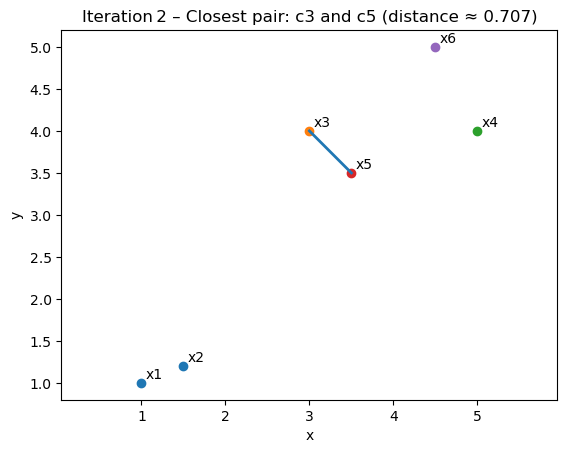

In [40]:
# Points and current clusters -------------------------------------------------
points = [(1, 1), (1.5, 1.2), (3, 4), (5, 4), (3.5, 3.5), (4.5, 5)]
point_labels = [f"x{i+1}" for i in range(len(points))]

# Current cluster membership
clusters = {
    "c12": [0, 1],  # x1, x2
    "c3":  [2],     # x3
    "c4":  [3],     # x4
    "c5":  [4],     # x5
    "c6":  [5],     # x6
}
cluster_names = list(clusters.keys())
M = len(cluster_names)

# Function: single‑linkage distance between two clusters
def single_linkage_distance(indices_a, indices_b):
    d_min = float("inf")
    for i in indices_a:
        for j in indices_b:
            d = math.dist(points[i], points[j])
            if d < d_min:
                d_min = d
    return d_min

# Build distance matrix for clusters
dist_mat = [[0.0]*M for _ in range(M)]
for (i, name_i), (j, name_j) in itertools.combinations(enumerate(cluster_names), 2):
    d = single_linkage_distance(clusters[name_i], clusters[name_j])
    dist_mat[i][j] = dist_mat[j][i] = d

df = pd.DataFrame(dist_mat, index=cluster_names, columns=cluster_names).round(3)
display("Iteration 2 – Cluster‑to‑cluster distances (single linkage)", df)

# Identify the minimum positive distance and the pair(s)
min_d = float("inf")
min_pairs = []
for i in range(M):
    for j in range(i+1, M):
        d = dist_mat[i][j]
        if d < min_d - 1e-12:
            min_d = d
            min_pairs = [(i, j)]
        elif abs(d - min_d) < 1e-12:
            min_pairs.append((i, j))

# Choose first pair for illustration
i_min, j_min = min_pairs[0]
pair = (cluster_names[i_min], cluster_names[j_min])

# --- Plot --------------------------------------------------------------------
plt.figure()
# Plot all clusters (each cluster a separate default colour cycle call)
for clust_name, idxs in clusters.items():
    xs = [points[i][0] for i in idxs]
    ys = [points[i][1] for i in idxs]
    plt.scatter(xs, ys)
    for idx in idxs:
        lbl = point_labels[idx]
        plt.text(points[idx][0]+0.05, points[idx][1]+0.05, lbl)

# Connect the closest pair with a line
# For robustness, draw dashed lines between *every* point combination that attained min_d
idxs_a, idxs_b = clusters[pair[0]], clusters[pair[1]]
for ia in idxs_a:
    for ib in idxs_b:
        if abs(math.dist(points[ia], points[ib]) - min_d) < 1e-12:
            plt.plot([points[ia][0], points[ib][0]],
                     [points[ia][1], points[ib][1]],
                     linewidth=2)

plt.title(f"Iteration 2 – Closest pair: {pair[0]} and {pair[1]} (distance ≈ {min_d:.3f})")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### Iteration 2 – Step 2 (again): find the next closest pair

After the first merge we have five clusters:

$$
C = \bigl\{c_{12},\; c_3,\; c_4,\; c_5,\; c_6\bigr\}.
$$

Using **single linkage** (minimum inter‑point distance) the distance matrix shown above reveals

$$
\min_{i\neq j} D(c_i,c_j)\;=\;0.707\quad\text{between }c_3\text{ and }c_5.
$$

No tie exists, so clusters **$c_3$** and **$c_5$** are the unique closest pair, highlighted by the line in the plot.

Let' proceed to merging $c_3$ and $c_5$ into a new cluster $c_{35}$?


'Iteration 2 – Step 3: clusters after merging c3 and c5'

,cluster,members
0,c12,"x1, x2"
1,c35,"x3, x5"
2,c4,x4
3,c6,x6


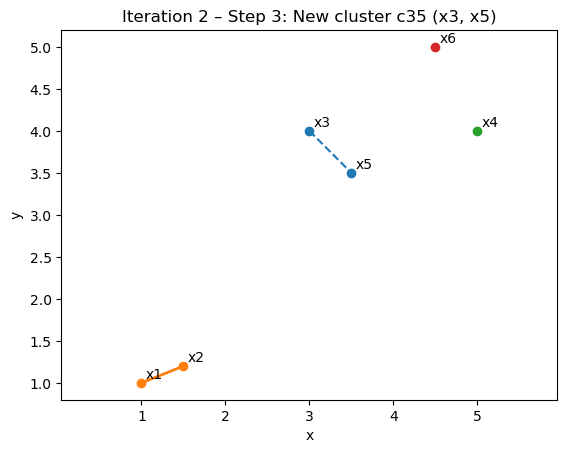

In [41]:

# --- Data --------------------------------------------------------------------
points = [(1, 1), (1.5, 1.2), (3, 4), (5, 4), (3.5, 3.5), (4.5, 5)]
point_labels = [f"x{i+1}" for i in range(len(points))]

# --- Step 3 of iteration 2: merge c3 and c5 into c35 --------------------------
clusters = {
    "c12": [0, 1],      # x1, x2 (already merged before)
    "c35": [2, 4],      # x3, x5 (new merge)
    "c4":  [3],         # x4
    "c6":  [5],         # x6
}

# Build a cluster → members table
rows = []
for cl_name, idxs in clusters.items():
    members = ", ".join(point_labels[i] for i in idxs)
    rows.append({"cluster": cl_name, "members": members})
df_clusters = pd.DataFrame(rows)

display("Iteration 2 – Step 3: clusters after merging c3 and c5", df_clusters)

# --- Plot --------------------------------------------------------------------
plt.figure()
# Plot each cluster; merged cluster c35 first to ensure same colour for both points
for cl_name in ["c35", "c12", "c4", "c6"]:
    idxs = clusters[cl_name]
    xs = [points[i][0] for i in idxs]
    ys = [points[i][1] for i in idxs]
    plt.scatter(xs, ys)
    for i in idxs:
        plt.text(points[i][0] + 0.05, points[i][1] + 0.05, point_labels[i])

# Connect x3 and x5 with a dashed line
plt.plot([points[2][0], points[4][0]], [points[2][1], points[4][1]], linestyle="--")

# Connect x1 and x2 with a solid line (already merged)
plt.plot([points[0][0], points[1][0]], [points[0][1], points[1][1]], linewidth=2)


plt.title("Iteration 2 – Step 3: New cluster c35 (x3, x5)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### Iteration 2 – Step 3: merge the closest pair

We merge **$c_3$** and **$c_5$** (found in the previous step) to form a new cluster

$$
c_{35}=c_3\cup c_5=\{x_3,\;x_5\}.
$$

The cluster set is now

$$
C=\bigl\{c_{12},\;c_{35},\;c_4,\;c_6\bigr\},
\quad |C| = 4.
$$

* The table lists the updated membership.
* In the plot, points $x_3$ and $x_5$ share a colour and are connected with a dashed segment to highlight the new cluster.

Back to Step 2...


'Iteration\u202f3 – Cluster‑to‑cluster distances (single linkage)'

,c12,c35,c4,c6
c12,0.000,3.048,4.482,4.841
c35,3.048,0.000,1.581,1.803
c4,4.482,1.581,0.000,1.118
c6,4.841,1.803,1.118,0.000


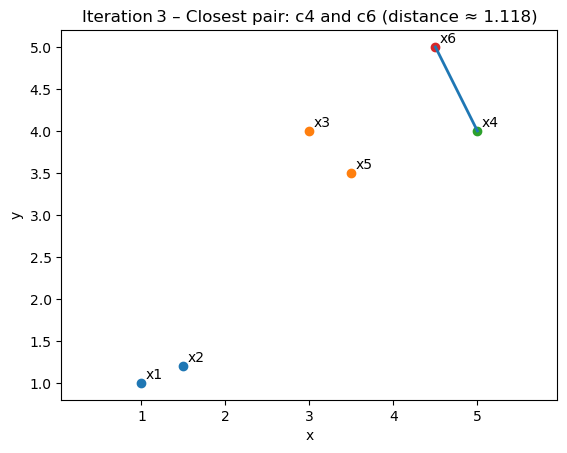

In [42]:


# ---------------------------------------------------------------------------
# Current clusters after the last merge
points = [(1, 1), (1.5, 1.2), (3, 4), (5, 4), (3.5, 3.5), (4.5, 5)]
point_labels = [f"x{i+1}" for i in range(len(points))]
clusters = {
    "c12": [0, 1],  # x1, x2
    "c35": [2, 4],  # x3, x5
    "c4":  [3],     # x4
    "c6":  [5],     # x6
}
cluster_names = list(clusters.keys())
M = len(cluster_names)

# Helper: single‑linkage distance between two clusters
def single_linkage(a, b):
    dmin = float("inf")
    for ia in a:
        for ib in b:
            d = math.dist(points[ia], points[ib])
            if d < dmin:
                dmin = d
    return dmin

# Build distance matrix
dist_mat = [[0.0]*M for _ in range(M)]
for (i, name_i), (j, name_j) in itertools.combinations(enumerate(cluster_names), 2):
    d = single_linkage(clusters[name_i], clusters[name_j])
    dist_mat[i][j] = dist_mat[j][i] = d
df = pd.DataFrame(dist_mat, index=cluster_names, columns=cluster_names).round(3)
display("Iteration 3 – Cluster‑to‑cluster distances (single linkage)", df)

# Identify closest pair(s)
min_d = float("inf")
min_pairs = []
for i in range(M):
    for j in range(i+1, M):
        d = dist_mat[i][j]
        if d < min_d - 1e-12:
            min_d = d
            min_pairs = [(i, j)]
        elif abs(d - min_d) < 1e-12:
            min_pairs.append((i, j))

# Choose first pair for illustration
i_min, j_min = min_pairs[0]
pair = (cluster_names[i_min], cluster_names[j_min])

# ---------------------------------------------------------------------------
# Plot
plt.figure()
# Plot clusters; keep each cluster’s points together so they share a colour
for cl_name in cluster_names:
    idxs = clusters[cl_name]
    xs = [points[i][0] for i in idxs]
    ys = [points[i][1] for i in idxs]
    plt.scatter(xs, ys)
    for i in idxs:
        plt.text(points[i][0] + 0.05, points[i][1] + 0.05, point_labels[i])

# Draw line(s) between points that realise the min distance
idxs_a, idxs_b = clusters[pair[0]], clusters[pair[1]]
for ia in idxs_a:
    for ib in idxs_b:
        if abs(math.dist(points[ia], points[ib]) - min_d) < 1e-12:
            plt.plot([points[ia][0], points[ib][0]],
                     [points[ia][1], points[ib][1]],
                     linewidth=2)

plt.title(f"Iteration 3 – Closest pair: {pair[0]} and {pair[1]} (distance ≈ {min_d:.3f})")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### Iteration 3 – Step 2: find the next closest pair

With four clusters remaining,

$$
C = \bigl\{c_{12},\; c_{35},\; c_4,\; c_6\bigr\},
$$

the single‑linkage distance matrix (shown in the table) gives the minimum

$$
\min_{i\neq j} D(c_i,c_j)\;=\;1.118\quad\text{between }c_4\text{ and }c_6.
$$

No ties occur, so **$c_4$** and **$c_6$** are uniquely the closest pair.
The plot marks this by drawing the connecting line at that distance.

We now merge these two singletons into a new cluster $c_{46}$ (Step 3 of this iteration).


'Iteration 3 – Step 3: clusters after merging c4 and c6'

,cluster,members
0,c12,"x1, x2"
1,c35,"x3, x5"
2,c46,"x4, x6"


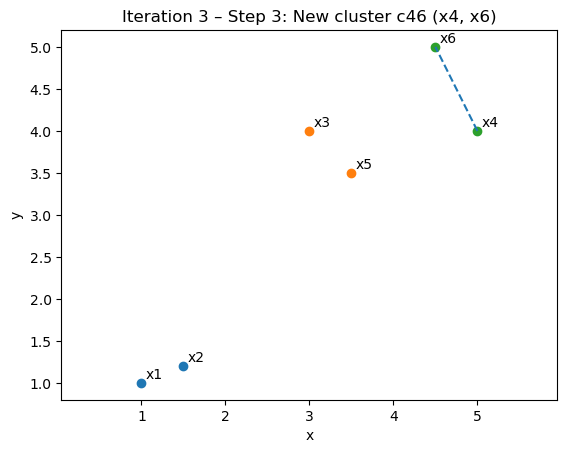

In [43]:


# ---------------------------------------------------------------------------
# Data points and labels
points = [(1, 1), (1.5, 1.2), (3, 4), (5, 4), (3.5, 3.5), (4.5, 5)]
point_labels = [f"x{i+1}" for i in range(len(points))]

# --- Step 3 of iteration 3: merge c4 and c6 into c46 -------------------------
clusters = {
    "c12": [0, 1],      # x1, x2 (from first merge)
    "c35": [2, 4],      # x3, x5 (from second merge)
    "c46": [3, 5],      # x4, x6 (new merge)
}

# Build a tidy DataFrame
rows = []
for cl_name, idxs in clusters.items():
    members = ", ".join(point_labels[i] for i in idxs)
    rows.append({"cluster": cl_name, "members": members})
df_clusters = pd.DataFrame(rows)

display("Iteration 3 – Step 3: clusters after merging c4 and c6", df_clusters)

# ---------------------------------------------------------------------------
# Plot
plt.figure()
for cl_name in clusters:
    idxs = clusters[cl_name]
    xs = [points[i][0] for i in idxs]
    ys = [points[i][1] for i in idxs]
    plt.scatter(xs, ys)
    for i in idxs:
        plt.text(points[i][0] + 0.05, points[i][1] + 0.05, point_labels[i])

# Connect x4 and x6 with a dashed line
plt.plot([points[3][0], points[5][0]], [points[3][1], points[5][1]], linestyle="--")

plt.title("Iteration 3 – Step 3: New cluster c46 (x4, x6)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### Iteration 3 – Step 3: merge the selected pair

Clusters **$c_4$** and **$c_6$** are merged, giving

$$
c_{46}=c_4\cup c_6=\{x_4,\;x_6\}.
$$

Our cluster set shrinks to three members:

$$
C=\bigl\{c_{12},\;c_{35},\;c_{46}\bigr\},
\quad |C| = 3.
$$

* The table details the membership of each cluster.
* In the plot, points $x_4$ and $x_6$ share the same colour, and the dashed segment outlines the new cluster $c_{46}$.

We still have more than one cluster, so we return to Step 2 once more.


'Iteration 4 – Cluster‑to‑cluster distances (single linkage)'

,c12,c35,c46
c12,0.000,3.048,4.482
c35,3.048,0.000,1.581
c46,4.482,1.581,0.000


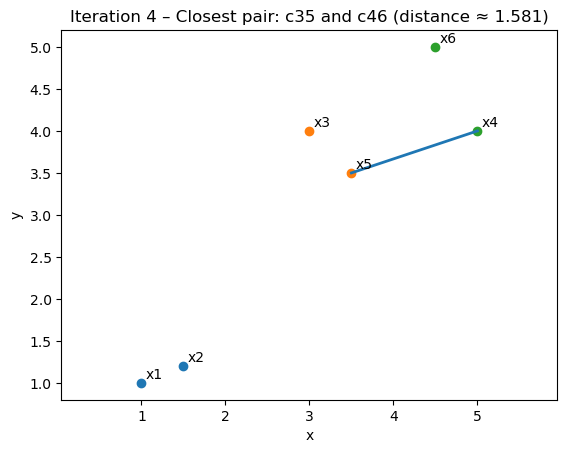

In [44]:


# Data -----------------------------------------------------------------------
points = [(1, 1), (1.5, 1.2), (3, 4), (5, 4), (3.5, 3.5), (4.5, 5)]
point_labels = [f"x{i+1}" for i in range(len(points))]
clusters = {
    "c12": [0, 1],      # x1, x2
    "c35": [2, 4],      # x3, x5
    "c46": [3, 5],      # x4, x6
}
cluster_names = list(clusters.keys())
M = len(cluster_names)

# Single‑linkage distance
def single_linkage(idx_a, idx_b):
    return min(math.dist(points[i], points[j]) for i in idx_a for j in idx_b)

# Build distance matrix
dist_mat = [[0.0]*M for _ in range(M)]
for (i, name_i), (j, name_j) in itertools.combinations(enumerate(cluster_names), 2):
    d = single_linkage(clusters[name_i], clusters[name_j])
    dist_mat[i][j] = dist_mat[j][i] = d
df = pd.DataFrame(dist_mat, index=cluster_names, columns=cluster_names).round(3)

display("Iteration 4 – Cluster‑to‑cluster distances (single linkage)", df)

# Identify closest pair
min_d = float("inf")
closest = None
for i in range(M):
    for j in range(i+1, M):
        if dist_mat[i][j] < min_d - 1e-12:
            min_d = dist_mat[i][j]
            closest = (cluster_names[i], cluster_names[j])

# Plot -----------------------------------------------------------------------
plt.figure()
for cl_name in cluster_names:
    idxs = clusters[cl_name]
    xs = [points[i][0] for i in idxs]
    ys = [points[i][1] for i in idxs]
    plt.scatter(xs, ys)
    for i in idxs:
        plt.text(points[i][0] + 0.05, points[i][1] + 0.05, point_labels[i])

# Mark the lines that achieve min distance
a_idxs, b_idxs = clusters[closest[0]], clusters[closest[1]]
for ia in a_idxs:
    for ib in b_idxs:
        if abs(math.dist(points[ia], points[ib]) - min_d) < 1e-12:
            plt.plot([points[ia][0], points[ib][0]],
                     [points[ia][1], points[ib][1]],
                     linewidth=2)

plt.title(f"Iteration 4 – Closest pair: {closest[0]} and {closest[1]} (distance ≈ {min_d:.3f})")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### Iteration 4 – Step 2: determine the closest pair (three clusters left)

Current cluster set

$$
C = \bigl\{c_{12},\; c_{35},\; c_{46}\bigr\}.
$$

The single‑linkage distance matrix (see above) shows that the minimum inter‑cluster distance is

$$
\min_{i\neq j} D(c_i,c_j)\;=\;1.581
\quad\text{between }c_{35}\text{ and }c_{46}.
$$

Thus **$c_{35}$** and **$c_{46}$** are the unique closest pair (highlighted by the connecting line).


We now carry out Step 3 and merge them into a new cluster $c_{3546}$, leaving only two clusters in $C$.


'Iteration 4 – Step 3: clusters after merging c35 and c46'

,cluster,members
0,c12,"x1, x2"
1,c3546,"x3, x5, x4, x6"


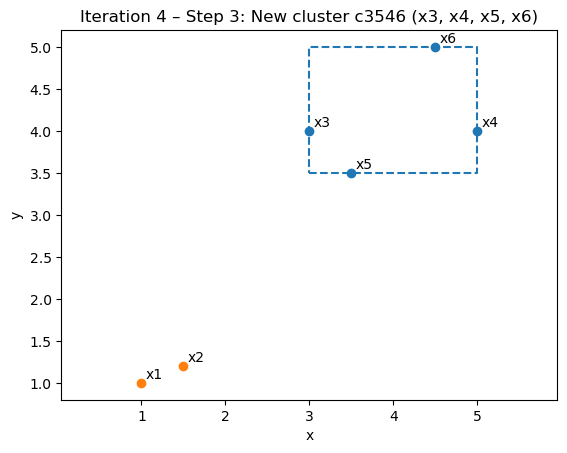

In [45]:


# ---------------------------------------------------------------------------
# Data points and labels
points = [(1, 1), (1.5, 1.2), (3, 4), (5, 4), (3.5, 3.5), (4.5, 5)]
point_labels = [f"x{i+1}" for i in range(len(points))]

# --- Step 3 of iteration 4: merge c35 and c46 into c3546 ---------------------
clusters = {
    "c12":   [0, 1],          # x1, x2
    "c3546": [2, 4, 3, 5],    # x3, x5, x4, x6  (new mega‑cluster)
}

# Build a DataFrame for cluster membership
rows = []
for cl_name, idxs in clusters.items():
    members = ", ".join(point_labels[i] for i in idxs)
    rows.append({"cluster": cl_name, "members": members})
df_clusters = pd.DataFrame(rows)

display("Iteration 4 – Step 3: clusters after merging c35 and c46", df_clusters)

# ---------------------------------------------------------------------------
# Plot
plt.figure()
# Plot the merged cluster first so its points share one colour
for cl_name in ["c3546", "c12"]:
    idxs = clusters[cl_name]
    xs = [points[i][0] for i in idxs]
    ys = [points[i][1] for i in idxs]
    plt.scatter(xs, ys)
    for i in idxs:
        plt.text(points[i][0] + 0.05, points[i][1] + 0.05, point_labels[i])

# Draw dashed bounding box around c3546
xs_c = [points[i][0] for i in clusters["c3546"]]
ys_c = [points[i][1] for i in clusters["c3546"]]
xmin, xmax, ymin, ymax = min(xs_c), max(xs_c), min(ys_c), max(ys_c)
plt.plot([xmin, xmax, xmax, xmin, xmin],
         [ymin, ymin, ymax, ymax, ymin],
         linestyle="--")

plt.title("Iteration 4 – Step 3: New cluster c3546 (x3, x4, x5, x6)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### Iteration 4 – Step 3: merge $c_{35}$ and $c_{46}$

The two closest clusters are merged to create a **larger cluster**

$$
c_{3546}=c_{35}\cup c_{46}
           =\{x_3,\;x_4,\;x_5,\;x_6\}.
$$

Our cluster list now contains **only two clusters**:

$$
C=\bigl\{c_{12},\;c_{3546}\bigr\},
\quad |C| = 2.
$$

* The table summarises the new membership.
* The plot shows the four points in $c_{3546}$ with a dashed bounding box, while $x_1,x_2$ remain together in $c_{12}$.

---

Because we still have more than one cluster, the algorithm returns to Step 2 one last time; the next merge will produce the final single cluster and finish the algorithm.

'Final Iteration – Step 2: distance matrix for the two clusters'

,c12,c3546
c12,0.000,3.048
c3546,3.048,0.000


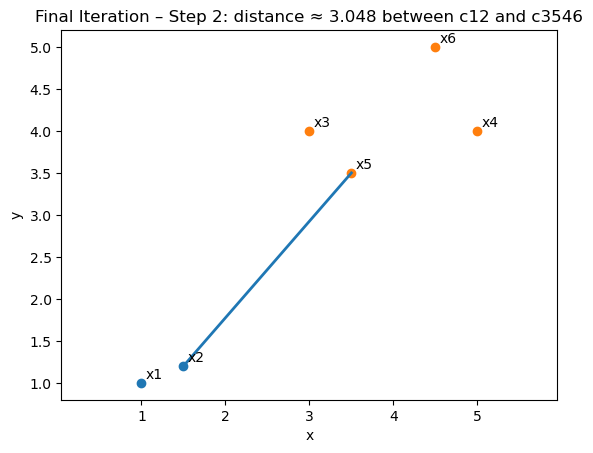

'Final Iteration – Step 3: single remaining cluster'

,cluster,members
0,c_all,"x1, x2, x3, x4, x5, x6"


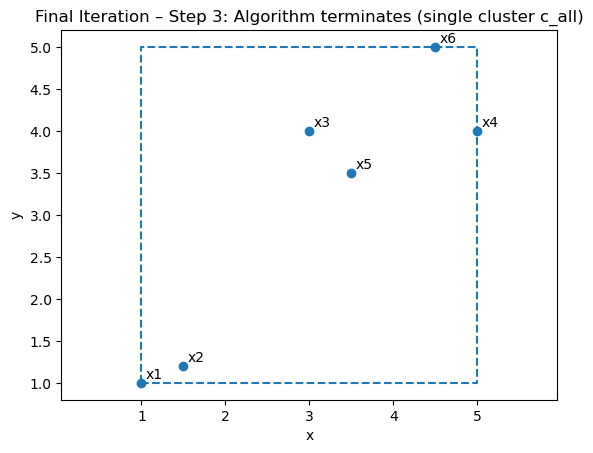

In [46]:


# ---------------------------------------------------------------------------
# Data points and labels
points = [(1, 1), (1.5, 1.2), (3, 4), (5, 4), (3.5, 3.5), (4.5, 5)]
point_labels = [f"x{i+1}" for i in range(len(points))]

# ---------------------------------------------------------------------------
# Final iteration – Step 2: distance between the two remaining clusters
clusters_step2 = {
    "c12":   [0, 1],              # x1, x2
    "c3546": [2, 3, 4, 5],        # x3, x4, x5, x6
}
cluster_names = list(clusters_step2.keys())
M = len(cluster_names)

def single_linkage(a, b):
    return min(math.dist(points[i], points[j]) for i in a for j in b)

# Build 2×2 distance matrix
dist_mat = [[0.0]*M for _ in range(M)]
for (i, name_i), (j, name_j) in itertools.combinations(enumerate(cluster_names), 2):
    d = single_linkage(clusters_step2[name_i], clusters_step2[name_j])
    dist_mat[i][j] = dist_mat[j][i] = d
df_step2 = pd.DataFrame(dist_mat, index=cluster_names, columns=cluster_names).round(3)

display("Final Iteration – Step 2: distance matrix for the two clusters", df_step2)

# Identify the unique closest pair (only one possible)
min_d = dist_mat[0][1]

# Plot Step 2
plt.figure()
for cl_name in cluster_names:
    idxs = clusters_step2[cl_name]
    xs = [points[i][0] for i in idxs]
    ys = [points[i][1] for i in idxs]
    plt.scatter(xs, ys)
    for i in idxs:
        plt.text(points[i][0] + 0.05, points[i][1] + 0.05, point_labels[i])

# Connect the closest points that realise min distance
idxs_a = clusters_step2["c12"]
idxs_b = clusters_step2["c3546"]
for ia in idxs_a:
    for ib in idxs_b:
        if abs(math.dist(points[ia], points[ib]) - min_d) < 1e-12:
            plt.plot([points[ia][0], points[ib][0]],
                     [points[ia][1], points[ib][1]],
                     linewidth=2)

plt.title(f"Final Iteration – Step 2: distance ≈ {min_d:.3f} between c12 and c3546")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

# ---------------------------------------------------------------------------
# Final iteration – Step 3: merge into single cluster
final_cluster = {"c_all": list(range(len(points)))}

# Build membership table
df_final = pd.DataFrame([{
    "cluster": "c_all",
    "members": ", ".join(point_labels)
}])

display("Final Iteration – Step 3: single remaining cluster", df_final)

# Plot Step 3
plt.figure()
xs_all = [p[0] for p in points]
ys_all = [p[1] for p in points]
plt.scatter(xs_all, ys_all)
for lbl, (x, y) in zip(point_labels, points):
    plt.text(x + 0.05, y + 0.05, lbl)

# Draw encompassing dashed rectangle
xmin, xmax, ymin, ymax = min(xs_all), max(xs_all), min(ys_all), max(ys_all)
plt.plot([xmin, xmax, xmax, xmin, xmin],
         [ymin, ymin, ymax, ymax, ymin],
         linestyle="--")

plt.title("Final Iteration – Step 3: Algorithm terminates (single cluster c_all)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


## Final iteration – completing the algorithm

### Step 2

With only two clusters left, the single‑linkage distance between
$c_{12}=\{x_1,x_2\}$ and $c_{3546}=\{x_3,x_4,x_5,x_6\}$ is

$$
\min_{i\in c_{12},\,j\in c_{3546}} \!\!D(i,j)
   \;=\; D(x_2,x_5)
   \;\approx\; 3.048.
$$

(The table and the first plot show this and highlight the two points that realise the minimum.)

### Step 3

Because there is only one possible pair, we merge them:

$$
c_{\text{all}}
  \;=\; c_{12}\cup c_{3546}
  \;=\;\{x_1,x_2,x_3,x_4,x_5,x_6\}.
$$

Now $|C|=1$. The algorithm **terminates**: every observation belongs to the single final cluster, completing the hierarchical tree.

---

That’s the full run of agglomerative clustering on this toy data set using *single‑linkage* distance. Let us now examine the resulting dendrogram.


'Linkage matrix (SciPy format)'

,idx1,idx2,distance,n_samples
0,0.0,1.0,0.538516,2.0
1,2.0,4.0,0.707107,2.0
2,3.0,5.0,1.118034,2.0
3,7.0,8.0,1.581139,4.0
4,6.0,9.0,3.047950,6.0


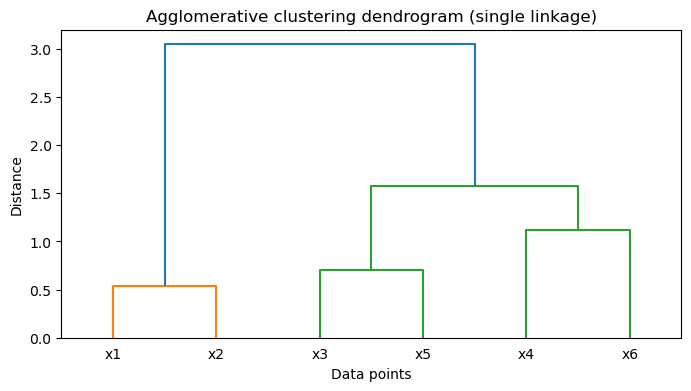

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Coordinates of the six points
points = np.array([
    [1.0, 1.0],   # x1  (index 0)
    [1.5, 1.2],   # x2  (index 1)
    [3.0, 4.0],   # x3  (index 2)
    [5.0, 4.0],   # x4  (index 3)
    [3.5, 3.5],   # x5  (index 4)
    [4.5, 5.0],   # x6  (index 5)
])

# Build the linkage matrix manually from the merge history
Z = np.array([
    [0, 1, 0.538516, 2],   # merge x1 & x2  -> c12
    [2, 4, 0.707107, 2],   # merge x3 & x5  -> c35
    [3, 5, 1.118034, 2],   # merge x4 & x6  -> c46
    [7, 8, 1.581139, 4],   # merge c35 & c46 -> c3546
    [6, 9, 3.047950, 6],   # merge c12 & c3546 -> c_all
])

# Display the linkage matrix
df_Z = pd.DataFrame(Z, columns=["idx1", "idx2", "distance", "n_samples"]).round(6)
display("Linkage matrix (SciPy format)", df_Z)

# Plot the dendrogram
plt.figure(figsize=(8, 4))
hierarchy.dendrogram(
    Z,
    labels=["x1", "x2", "x3", "x4", "x5", "x6"],
    leaf_rotation=0,
    leaf_font_size=10,
)
plt.title("Agglomerative clustering dendrogram (single linkage)")
plt.ylabel("Distance")
plt.xlabel("Data points")
plt.show()


## How to read the dendrogram
1. Horizontal axis – leaves: each leaf (x1 … x6) is an original data point.

2. Vertical axis – height: the height at which two branches join equals the inter‑cluster distance at that merge.

3. Merges you saw step‑by‑step:

- x1 + x2 merge first at ≈ 0.54.

- x3 + x5 merge at ≈ 0.71.

- x4 + x6 merge at ≈ 1.12.

- The two 2‑point clusters (x3,x5) and (x4,x6) merge at ≈ 1.58.

- Finally, (x1,x2) merges with the 4‑point cluster at ≈ 3.05, giving the root of the tree.

4. Cutting the tree: drawing a horizontal line across the dendrogram lets you choose a distance threshold and see how many clusters you would obtain.

- For example, a cut at height ≈ 1.4 would leave three clusters: {x1,x2}, {x3,x5}, {x4,x6}.

The linkage matrix displayed above is the exact numeric summary that SciPy (or any hierarchical‑clustering library) would produce for this run of single‑linkage agglomeration.